<a href="https://colab.research.google.com/github/Ananthk96/Customer-Segmentation-using-K_Means-Clustering/blob/main/Customer_segmentation_using_k_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATASET

In [ ]:

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/Python/Unsupervised_models/online_retail_II.xlsx'
df=pd.read_excel(file_path)

# EDA

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.describe()

#Note: Negative values seen in quantity and price columns
# Customer_ID's missing for over 10k records

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


# DATA CLEANING

In [ ]:
df[df['Quantity'] < 0] #over 12k records
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [ ]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [ ]:
df.loc[df['Customer ID'].isna()].head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [ ]:
df[(df['Customer ID'].isnull()) & (df['Country'] != 'United Kingdom')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
6376,C489881,21102,"CANDLE IN JAR COLLAGE , VANILLA",-31,2009-12-02 16:20:00,2.55,NaN,Nigeria
6377,C489881,72802A,ROSE SCENT CANDLE IN JEWELLED BOX,-16,2009-12-02 16:20:00,4.25,NaN,Nigeria
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14482,490541,85123A,WHITE HANGING HEART T-LIGHT HOLDER,96,2009-12-07 09:25:00,2.55,NaN,EIRE
27481,491702,84378,SET OF 3 HEART COOKIE CUTTERS,12,2009-12-13 13:53:00,1.25,NaN,EIRE
...,...,...,...,...,...,...,...,...
509297,536885,22867,HAND WARMER BIRD DESIGN,12,2010-12-03 11:42:00,2.10,NaN,EIRE
509298,536885,22865,HAND WARMER OWL DESIGN,12,2010-12-03 11:42:00,2.10,NaN,EIRE
509299,536885,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-12-03 11:42:00,2.10,NaN,EIRE
509300,536885,22312,OFFICE MUG WARMER POLKADOT,36,2010-12-03 11:42:00,2.95,NaN,EIRE


In [ ]:

# Convert 'Customer ID' to numeric, coercing errors to NaN
df['Customer ID'] = pd.to_numeric(df['Customer ID'], errors='coerce')


# errors='coerce':
 This is a crucial argument within the pd.to_numeric function. It tells the function how to handle any values within the 'Customer ID' column that cannot be converted to numbers. By setting errors='coerce', you are instructing it to replace any such non-numeric values with NaN (Not a Number), which is a special value in Pandas used to represent missing or invalid data.

In [ ]:
(df['Customer ID'].isna().sum())/len(df)
# 107927 null cust_id's meaning ~20% cust_id's are Null.

0.20539488182757618

In [ ]:
# Dataset description says invoices starting with C are cancellations.
# Otherwise they are 6 digit numbers

df[df['Invoice'].str.match(r'^C', na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,cancelled
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,cancelled
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,cancelled
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,cancelled
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,cancelled


In [ ]:
len(df[(df['Invoice'].str.match(r'^C', na=False)) & (df['Quantity']<0)]) #10,205 records

#df[(df['Invoice'].str.match(r'^C', na=False)) & (~df['Quantity']<0)]    -- only 1 row match found


10205

In [ ]:
# Create the 'Order Type' column based on the 'Invoice' column to label cancelled orders

df['Order Type'] = df['Invoice'].astype(str).str[0].apply(lambda x: 'cancelled' if x == 'C' else 'usual')
df.loc[df['Order Type']=='cancelled'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,cancelled
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,cancelled
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,cancelled
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,cancelled
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,cancelled


In [ ]:
df['StockCode'].dtype

dtype('O')

In [ ]:
# Now stckcode's must be 5 digit numbers. Lets see if that is the case
df[df['StockCode'].astype(str).str.len() != 5]  #better to cast as a string always before applying other functions

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,usual
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,usual
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,usual
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom,usual
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom,usual
...,...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom,usual
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom,usual
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom,usual
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,usual


In [ ]:
df['Order Type'].value_counts()

,count
Order Type,
usual,515255
cancelled,10206


In [ ]:

import pandas as pd

def check_stock_code(stock_code):
    """
    Checks the length of a stock code and assigns labels accordingly.

    Args:
        stock_code: The stock code string.

    Returns:
        "Ok" if the length is 5, "Longer" if greater than 5, "Shorter" if less than 5.
    """
    length = len(str(stock_code))  # Convert to string to handle potential non-string inputs
    if length == 5:
        return "Ok"
    elif length > 5:
        return "Longer"
    else:
        return "Shorter"


df['StockCodeLabel'] = df['StockCode'].apply(check_stock_code)

In [ ]:
df[df['StockCodeLabel']=="Shorter"]

# Ok had 445349 rows || Longer had 77358 rows || Shorter had 2754 rows

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type,StockCodeLabel
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France,usual,Shorter
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA,usual,Shorter
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium,usual,Shorter
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany,usual,Shorter
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom,cancelled,Shorter
...,...,...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom,usual,Shorter
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom,usual,Shorter
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom,usual,Shorter
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom,usual,Shorter


In [ ]:
# Stockcode consists exclusively of one or more alphabets (Uppercase or Lowercase) OR has exactly 5 digits and then one alphabet

df[(df['StockCode'].str.match(r'^[A-Za-z]+$', na=False)) | (df['StockCode'].str.match(r'^\\d{5}[A-Za-z]$', na=False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type,StockCodeLabel
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France,usual,Shorter
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA,usual,Shorter
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium,usual,Shorter
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany,usual,Shorter
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom,cancelled,Shorter
...,...,...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom,usual,Shorter
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom,usual,Shorter
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom,usual,Shorter
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom,usual,Shorter


**^:**  Matches the beginning of the string.

**[A-Za-z]+:** Matches one or more uppercase or lowercase letters.

**$:** Matches the end of the string.

**^\\d{5}[A-Za-z]$** 5 digits and an alphabet

In [ ]:
df_copy=df.copy()

We are removing the cancelled orders

In [ ]:
df_copy=df_copy[df_copy['Order Type']=='usual']

# df_copy.describe(include='O')

In [ ]:
# We will keep only stock Codes with

mask=(
        (df_copy['StockCode'].astype(str).str.match(r'^\d{5}$')) |
        (df_copy['StockCode'].astype(str).str.match(r'^\d{5}[a-zA-Z]+$')) |
        (df_copy['StockCode'].astype(str).str.match(r'^PADS$'))
    )

df_copy=df_copy[mask]

`r'^PADS$': This pattern matches strings that are exactly "PADS" from beginning to end.

In [ ]:
df_copy.describe()
# Price doesnt have -ve values anymore. But Quantity still showing negative.

,Quantity,InvoiceDate,Price,Customer ID
count,512796.000000,512796,512796.000000,406337.000000
mean,11.001279,2010-06-28 18:26:52.709732352,3.391447,15373.632992
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,14004.000000
50%,3.000000,2010-07-06 14:25:00,2.100000,15326.000000
75%,10.000000,2010-10-15 14:50:00,4.210000,16814.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,104.352433,NaN,5.067864,1677.365907


In [ ]:
df_copy[df_copy['Quantity']<0].count()

,0
Invoice,2102
StockCode,2102
Description,294
Quantity,2102
InvoiceDate,2102
Price,2102
Customer ID,0
Country,2102
Order Type,2102
StockCodeLabel,2102


In [ ]:
# need to drop null customer id's
df_copy.dropna(subset=['Customer ID'], inplace=True)

In [ ]:
df_copy.describe()

# no  more null quantities but observing 0 price rows


,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [ ]:
df_copy[df_copy['Price']<=0].count()
# just 28 records. Lets take them out

,0
Invoice,28
StockCode,28
Description,28
Quantity,28
InvoiceDate,28
Price,28
Customer ID,28
Country,28
Order Type,28
StockCodeLabel,28


In [ ]:
df_copy=df_copy[df_copy['Price']>0]

#now counting again
df_copy[df_copy['Price']<=0].count()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
Order Type,0
StockCodeLabel,0


In [ ]:
# check how much data we still have - 23% dropped

len(df_copy)/len(df)

0.7732429238325965

# FEATURE ENGINEERING

In [ ]:
df_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type,StockCodeLabel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,usual,Ok
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,usual,Longer
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,usual,Longer
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,usual,Ok
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,usual,Ok


In [ ]:
# Make a revenue column
df_copy['Revenue']=df_copy['Price']*df_copy['Quantity']
df_copy

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type,StockCodeLabel,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,usual,Ok,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,usual,Longer,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,usual,Longer,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,usual,Ok,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,usual,Ok,30.00
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,usual,Ok,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,usual,Ok,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,usual,Ok,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,usual,Ok,7.50


In [ ]:
df_copy.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Order Type', 'StockCodeLabel',
       'Revenue'],
      dtype='object')

In [ ]:
df_copy[df['Customer ID']==12346]
#just checking a cust_id to see how invoice numbers are acting
#so multiple products can be bought under same invoice ID. They should be treated as one purchase only

<ipython-input-42-ecb91b75a013>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy[df['Customer ID']==12346]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Order Type,StockCodeLabel,Revenue
107800,499763,20682,RED SPOTTY CHILDS UMBRELLA,1,2010-03-02 13:08:00,3.25,12346.0,United Kingdom,usual,Ok,3.25
107801,499763,20679,EDWARDIAN PARASOL RED,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,usual,Ok,5.95
107802,499763,15056N,EDWARDIAN PARASOL NATURAL,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,usual,Longer,5.95
107803,499763,15056BL,EDWARDIAN PARASOL BLACK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,usual,Longer,5.95
107804,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,usual,Longer,5.95
253028,513774,21524,DOORMAT SPOTTY HOME SWEET HOME,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,usual,Ok,7.49
253029,513774,22692,DOORMAT WELCOME TO OUR HOME,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,usual,Ok,7.49
253030,513774,22660,DOORMAT I LOVE LONDON,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,usual,Ok,7.49
253031,513774,22687,DOORMAT CHRISTMAS VILLAGE,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,usual,Ok,7.49
253032,513774,48173C,DOORMAT BLACK FLOCK,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,usual,Longer,7.49


In [ ]:
# Also lets compute some customer level metrics
aggregated_df=df_copy.groupby(by='Customer ID',as_index=False).agg(
    Monetary_value=('Revenue','sum'),
    Frequency=('Invoice','nunique'), # Not using count because multiple products are purchased under same invoice no. They should be counted as 1
    Recency=('InvoiceDate','max')
)

aggregated_df.head()

,Customer ID,Monetary_value,Frequency,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [ ]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer ID     4285 non-null   float64       
 1   Monetary_value  4285 non-null   float64       
 2   Frequency       4285 non-null   int64         
 3   Recency         4285 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 134.0 KB


In [ ]:
# creating a new column for recency. basically need to see no of days between max date in the table and invoice date of each individual row
from datetime import datetime


max_invoice_date =df_copy['InvoiceDate'].max()
max_invoice_date #timestamp datatype


Timestamp('2010-12-09 20:01:00')

In [ ]:
aggregated_df['Recency1']=max_invoice_date-aggregated_df['Recency']
aggregated_df.head()
#observing that this column has timedelta64 datatype

,Customer ID,Monetary_value,Frequency,Recency,Recency1
0,12346.0,169.36,2,2010-06-28 13:53:00,164 days 06:08:00
1,12347.0,1323.32,2,2010-12-07 14:57:00,2 days 05:04:00
2,12348.0,221.16,1,2010-09-27 14:59:00,73 days 05:02:00
3,12349.0,2221.14,2,2010-10-28 08:23:00,42 days 11:38:00
4,12351.0,300.93,1,2010-11-29 15:23:00,10 days 04:38:00


In [ ]:
# Need to covert the above  Recency1 timedelta variable into days

aggregated_df['Recency_days'] = aggregated_df['Recency1'].dt.days
aggregated_df.head()

,Customer ID,Monetary_value,Frequency,Recency,Recency1,Recency_days
0,12346.0,169.36,2,2010-06-28 13:53:00,164 days 06:08:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2 days 05:04:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73 days 05:02:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42 days 11:38:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10 days 04:38:00,10


In [ ]:
# just seeing if it can be done in one step. If we create a new column it seems to work OK
#initially i was trying to replace the original recency column with the new dates difference column directly and it was not working
aggregated_df['Recency2']=(max_invoice_date-aggregated_df['Recency']).dt.days
aggregated_df.head()

,Customer ID,Monetary_value,Frequency,Recency,Recency1,Recency_days,Recency2
0,12346.0,169.36,2,2010-06-28 13:53:00,164 days 06:08:00,164,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2 days 05:04:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73 days 05:02:00,73,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42 days 11:38:00,42,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10 days 04:38:00,10,10


In [ ]:
#removing the unwanted columns now
aggregated_df.drop(columns=['Recency1','Recency2'],inplace=True)

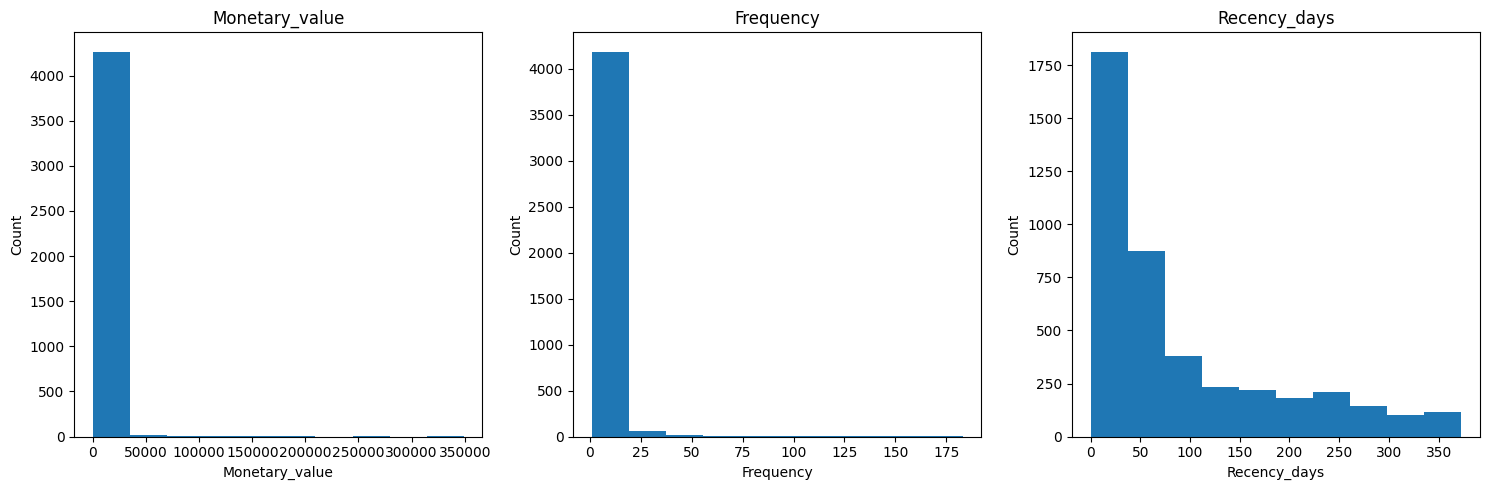

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
#plt.figsize=(15,5)  # both these snippets give 2 different outcomes. Use the first one


plt.subplot(1,3,1)
plt.hist(aggregated_df['Monetary_value'],bins=10)
plt.title('Monetary_value')
plt.xlabel('Monetary_value')
plt.ylabel('Count')


plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins=10)
plt.title('Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')


plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency_days'],bins=10)
plt.title('Recency_days')
plt.xlabel('Recency_days')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

Data looks very skewed for Monetary value and Frequency features. We need to do Outlier analysis on the data

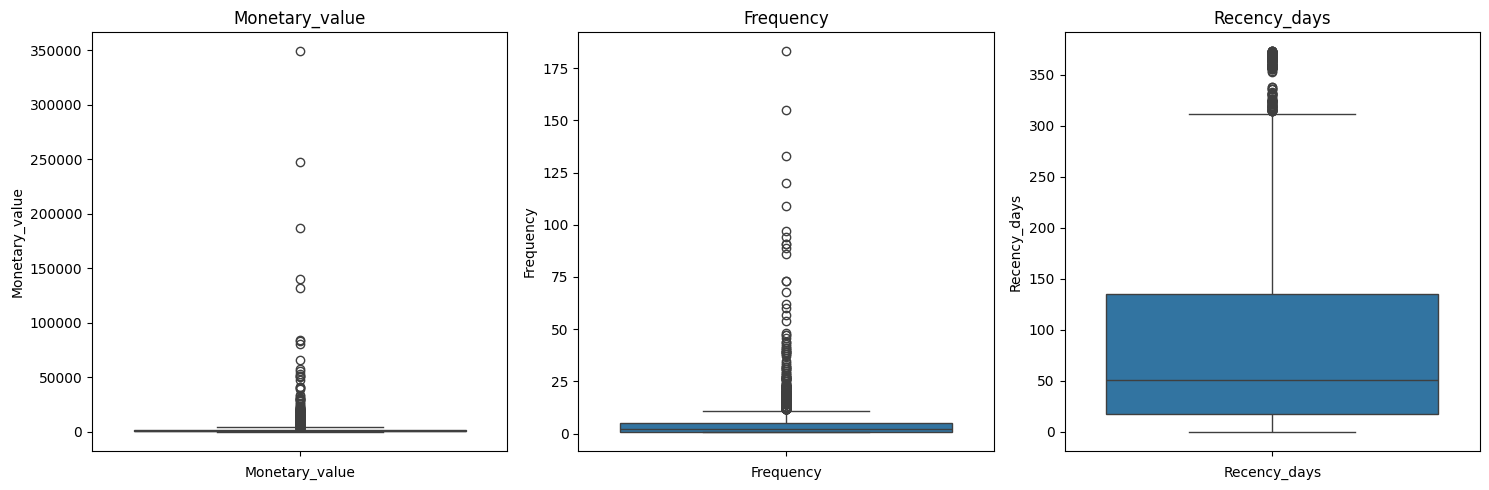

In [ ]:


plt.figure(figsize=(15,5))
#plt.figsize=(15,5)  # both these snippets give 2 different outcomes. Use the first one


plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df['Monetary_value'])
plt.title('Monetary_value')
plt.xlabel('Monetary_value')



plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df['Frequency'])
plt.title('Frequency')
plt.xlabel('Frequency')



plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency_days'])
plt.title('Recency_days')
plt.xlabel('Recency_days')



plt.tight_layout()
plt.show()

Monetary Value and Frequency showing huge outlier impact. This must be treated.
But Since these cases also correspond to customers with high spend / high volume transactions, we can't just ignore them altogether. We can look at them later and maybe classify them as a group in its own.

In [ ]:

# Get 25 th and 75th percentiles
l1=['Monetary_value','Frequency','Recency_days']

M_Q1=aggregated_df['Monetary_value'].quantile(0.25)
M_Q3=aggregated_df['Monetary_value'].quantile(0.75)
M_IQR=M_Q3-M_Q1

M_lower_bound= M_Q1-1.5*M_IQR
M_upper_bound= M_Q3+1.5*M_IQR

# Capture the outliers in a seperate df
Monetary_outliers_df=aggregated_df[(aggregated_df['Monetary_value']<M_lower_bound) | (aggregated_df['Monetary_value']>M_upper_bound)]
Monetary_outliers_df


,Customer ID,Monetary_value,Frequency,Recency,Recency_days
9,12357.0,11229.99,1,2010-11-16 10:05:00,23
25,12380.0,4782.84,4,2010-08-31 14:54:00,100
42,12409.0,12346.62,4,2010-10-15 10:24:00,55
48,12415.0,19468.84,4,2010-11-29 15:07:00,10
61,12431.0,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4253,18251.0,21964.14,8,2010-09-20 13:26:00,80


In [ ]:
Monetary_outliers_df.describe()

,Customer ID,Monetary_value,Frequency,Recency,Recency_days
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [ ]:
# Repeating for Frequency column
# Get 25 th and 75th percentiles


M_Q1=aggregated_df['Frequency'].quantile(0.25)
M_Q3=aggregated_df['Frequency'].quantile(0.75)
M_IQR=M_Q3-M_Q1

M_lower_bound=M_Q1-1.5*M_IQR
M_upper_bound=M_Q3+1.5*M_IQR

# Capture the outliers in a seperate df
Frequency_outliers_df=aggregated_df[(aggregated_df['Frequency']<M_lower_bound) | (aggregated_df['Frequency']>M_upper_bound)]
Frequency_outliers_df


,Customer ID,Monetary_value,Frequency,Recency,Recency_days
65,12437.0,6834.99,20,2010-11-09 14:46:00,30
84,12471.0,17721.45,44,2010-11-30 14:35:00,9
85,12472.0,10426.48,13,2010-12-05 14:19:00,4
92,12482.0,21941.72,27,2010-05-12 16:51:00,211
115,12523.0,2330.38,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14


In [ ]:
# Now lets get the data without these outliers
# exclude the outliers identified in Monetary_outliers_df and Frequency_df.
# Making use of index function to filter and remove these cases specifically

non_outlier_df=aggregated_df[(~aggregated_df.index.isin(Monetary_outliers_df.index)) & (~aggregated_df.index.isin(Frequency_outliers_df.index))]

In [ ]:
non_outlier_df.describe()

,Customer ID,Monetary_value,Frequency,Recency,Recency_days
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


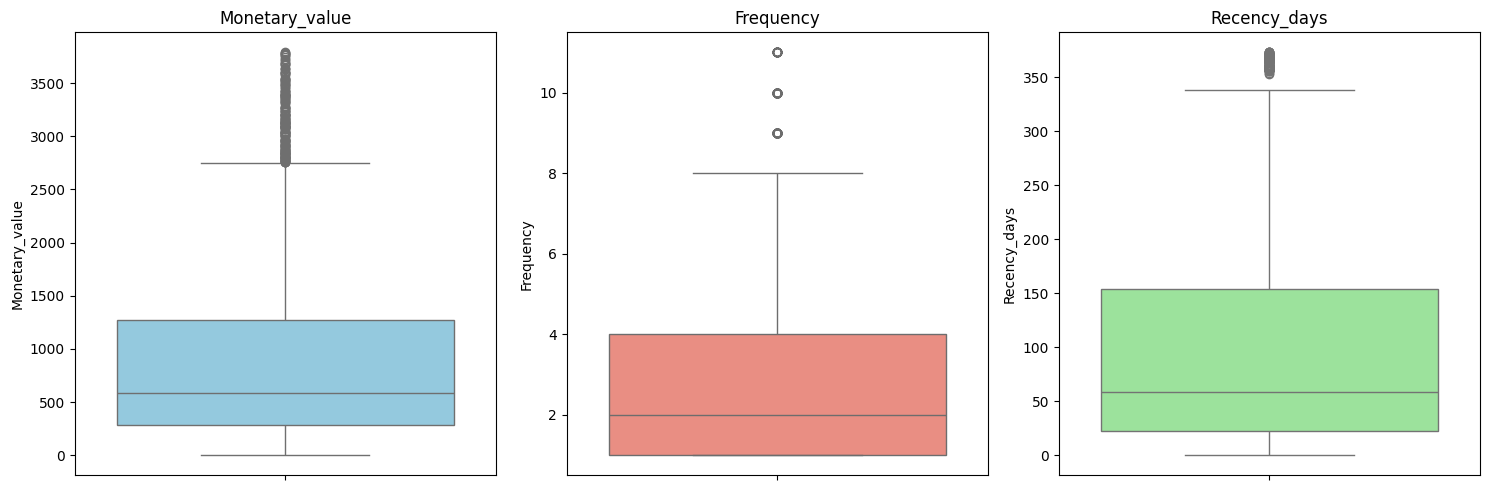

In [ ]:
# Plotting Box plots again now to see outlier distribution

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outlier_df['Monetary_value'],color='skyblue')
plt.title('Monetary_value')

plt.subplot(1,3,2)
sns.boxplot(data=non_outlier_df['Frequency'],color='salmon')
plt.title('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=non_outlier_df['Recency_days'],color='lightgreen')
plt.title('Recency_days')

plt.tight_layout()
plt.show()

Still outliers present in Monetary value. But much more tolerable than before. Think we can proceed with this.

In [ ]:
non_outlier_df[non_outlier_df['Monetary_value']>2500]
#observing ~250 records

,Customer ID,Monetary_value,Frequency,Recency,Recency_days
8,12356.0,3126.25,3,2010-11-24 12:24:00,15
10,12358.0,2519.01,3,2010-11-29 10:56:00,10
11,12359.0,2563.36,6,2010-10-10 11:16:00,60
40,12406.0,2975.06,3,2010-11-05 11:42:00,34
50,12417.0,2791.81,11,2010-10-25 14:27:00,45
...,...,...,...,...,...
4149,18094.0,3374.22,6,2010-09-19 14:03:00,81
4183,18145.0,2756.24,7,2010-11-22 12:55:00,17
4197,18168.0,2600.33,11,2010-12-02 18:08:00,7
4216,18194.0,3188.20,5,2010-09-27 13:08:00,73


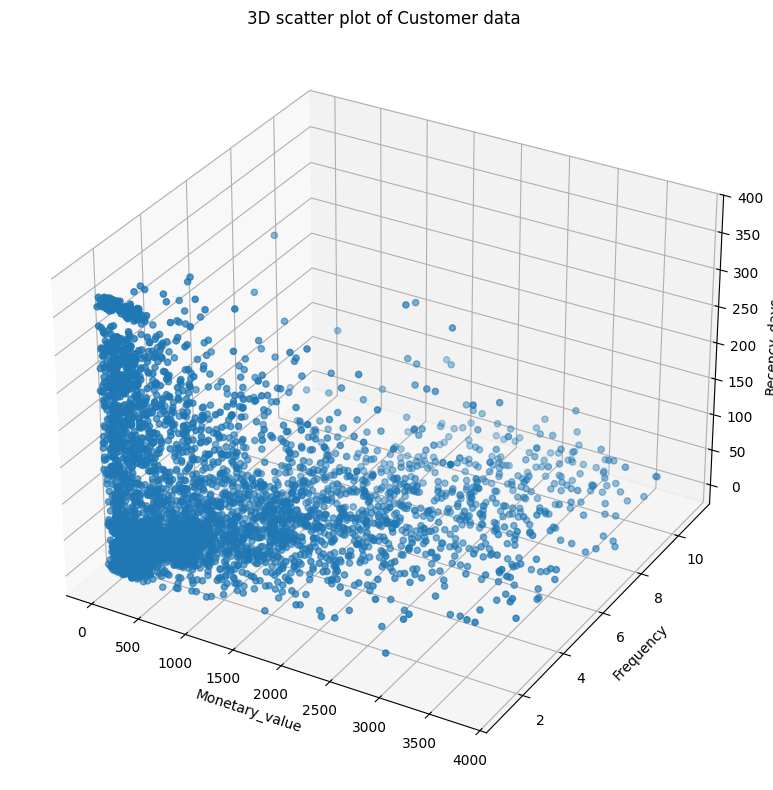

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
#creates a 3D axes object within the figure. projection='3d' specifies that we want a 3D plot
ax.scatter(non_outlier_df['Monetary_value'],non_outlier_df['Frequency'],non_outlier_df['Recency_days'])
ax.set_xlabel('Monetary_value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency_days')


plt.title("3D scatter plot of Customer data")
#plt.subplots_adjust(left=0.1,right=0.2,top=0.2)
plt.tight_layout()
plt.show()

# DATA SCALING

We have data about customers, including how much money they spent (Monetary_value), how often they shopped (Frequency), and how recently they made a purchase (Recency_days). These values are likely on very different scales (e.g., monetary value could be in thousands, frequency in tens, and recency in days). This code uses StandardScaler to adjust these features so they have a similar range and distribution, making it easier for machine learning models to learn patterns from the data. It essentially puts all the features on a level playing field.

In [ ]:
# Datapoints are of different scales. Uniformly Scaling them will give a better representation.
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_df=scaler.fit_transform(non_outlier_df[['Monetary_value','Frequency','Recency_days']])
scaled_df

#ok so we got the output as a numpy Array.

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [ ]:
#Lets make it a Df
scaled_df=pd.DataFrame(scaled_df,columns=['Monetary_value','Frequency','Recency_days'],index=non_outlier_df.index)
scaled_df.head()

,Monetary_value,Frequency,Recency_days
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700


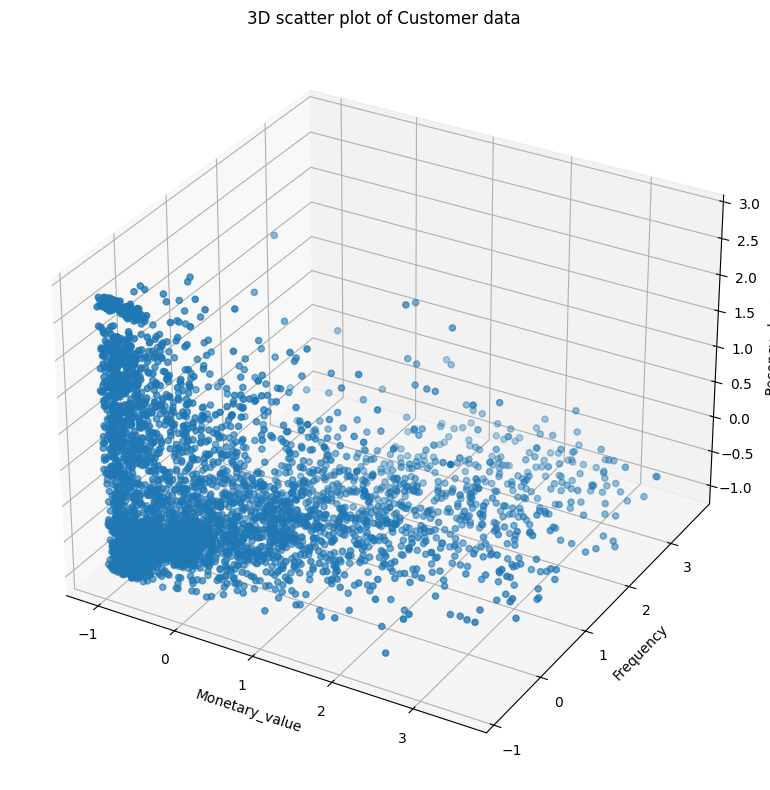

In [ ]:
#plot again now

fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
#creates a 3D axes object within the figure. projection='3d' specifies that we want a 3D plot
ax.scatter(scaled_df['Monetary_value'],scaled_df['Frequency'],scaled_df['Recency_days'])
ax.set_xlabel('Monetary_value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency_days')


plt.title("3D scatter plot of Customer data")
#plt.subplots_adjust(left=0.1,right=0.2,top=0.2)
plt.tight_layout()
plt.show()

# K-Means Clustering

We will attempt to find optimal no. of clusters using the Elbow method.

In [ ]:

import numpy as np
from sklearn.cluster import KMeans
max_k=12

inertia=[]
k_values=np.arange(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit_predict(scaled_df)
    inertia.append(kmeans.inertia_)

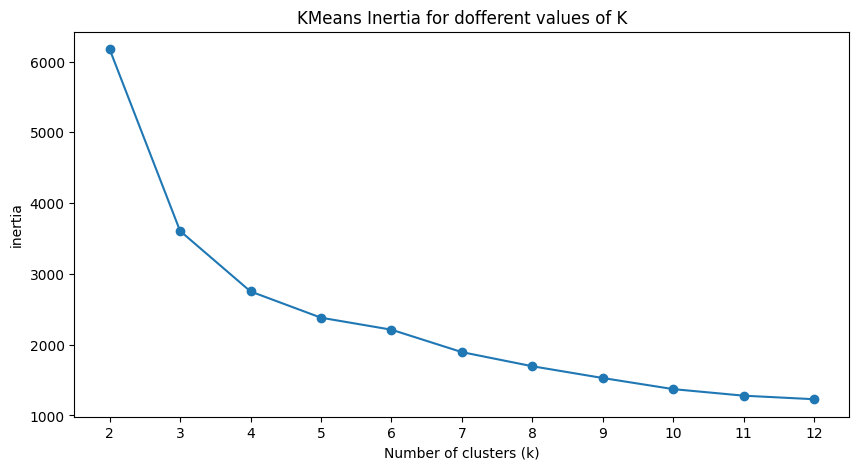

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(k_values,inertia,marker='o',)
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.title('KMeans Inertia for dofferent values of K')
plt.show()

Either 4 or 5 should be good looking by the plot. We can use the silhouette score to come to a decision.

# what a silhouette score is in K Means clustering

The silhouette score is a metric used to evaluate the quality of clusters in a clustering algorithm like K-Means.  It measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).  A higher silhouette score indicates that the data points are well-clustered, with clear separation between different clusters.

Here's a breakdown:

1. **Cohesion:**  For each data point, the silhouette score calculates the *average distance* between that point and all other points *within the same cluster*. This average distance is denoted as 'a'.  A smaller 'a' indicates better cohesion (data points are closer to each other within the cluster).

2. **Separation:** For the same data point, the silhouette score then calculates the *average distance* to all the points in the *nearest neighboring cluster*. This average distance is denoted as 'b'. A larger 'b' indicates better separation (data points are far from points in other clusters).

3. **Silhouette Coefficient:** The silhouette coefficient (s) for a single data point is calculated as:

   s = (b - a) / max(a, b)

   * **s close to +1:** Indicates the data point is well-matched to its own cluster and poorly matched to neighboring clusters.
   * **s close to 0:** Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
   * **s close to -1:** Indicates that the data point might have been assigned to the wrong cluster.

4. **Overall Silhouette Score:**  The overall silhouette score for the entire dataset is the *average* of the silhouette coefficients for all data points.  This gives a single metric to evaluate the quality of the clustering across all data points.  Typically, you want a silhouette score as close to +1 as possible.


**In the context of K-Means:**

You would typically calculate the silhouette score for different values of *k* (the number of clusters) and choose the *k* that yields the highest silhouette score.  This helps find the optimal number of clusters for your data.  This approach helps overcome the limitations of the elbow method which sometimes fails to clearly identify an optimal value for *k*.


In [ ]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
max_k=12

inertia=[]
silhouette=[]
k_values=np.arange(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    cluster_labels=kmeans.fit_predict(scaled_df)
    sil_score=silhouette_score(scaled_df,cluster_labels)
    silhouette.append(sil_score)
    inertia.append(kmeans.inertia_)

**cluster_labels** = kmeans.fit_predict(scaled_df): Fits the K-Means model to the scaled data (scaled_df) and predicts the cluster labels for each data point, storing them in cluster_labels.

**sil_score** = silhouette_score(scaled_df, cluster_labels): Calculates the silhouette score using the scaled data and the predicted cluster labels.

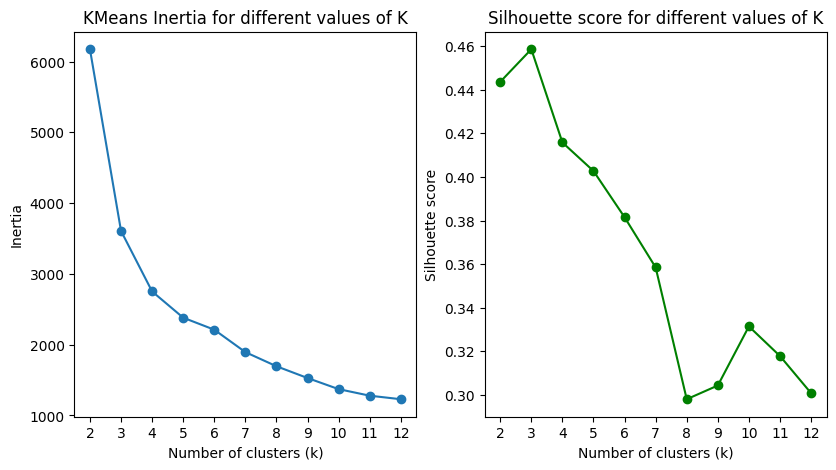

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(k_values,inertia,marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.title('KMeans Inertia for different values of K')


plt.subplot(1,3,2)
plt.plot(k_values,silhouette,marker='o',color='green',)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.xticks(k_values)
plt.title('Silhouette score for different values of K')
plt.show()

4 has better score than 5. As a general rule its better to keep cluster numbers as less as possible

In [ ]:
# Now we do the final prediction

kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:
#Lets add back the cluseter info to our actual data

non_outlier_df['Cluster']=cluster_labels
non_outlier_df

<ipython-input-68-62305e2a289f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df['Cluster']=cluster_labels


,Customer ID,Monetary_value,Frequency,Recency,Recency_days,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


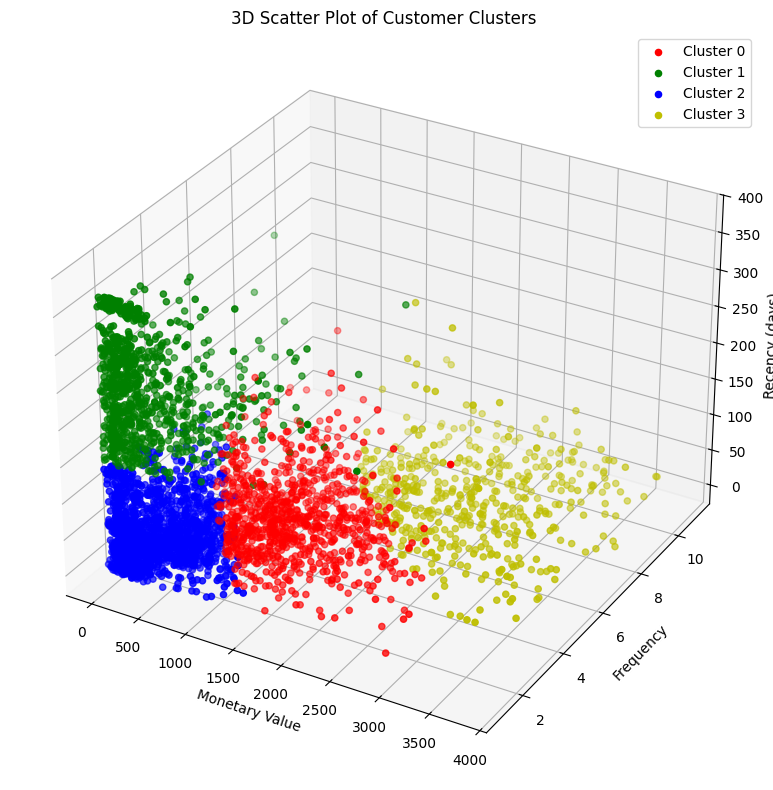

In [ ]:
# prompt: Need to visualize these new clusters in a 3d scatter plot, with each cluster showing different color

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to differentiate clusters
colors = ['r', 'g', 'b', 'y']  # Add more colors if you have more clusters
for cluster in range(4):  # For 4 clusters, adjust as necessary
    cluster_data = non_outlier_df[non_outlier_df['Cluster'] == cluster] #making a df
    ax.scatter(cluster_data['Monetary_value'],
               cluster_data['Frequency'],
               cluster_data['Recency_days'],
               c=colors[cluster], label=f'Cluster {cluster}')

'''
An Alternative way to map colors would be:

cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')
'''

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency (days)')
ax.set_title('3D Scatter Plot of Customer Clusters')
ax.legend()
plt.tight_layout()
plt.show()

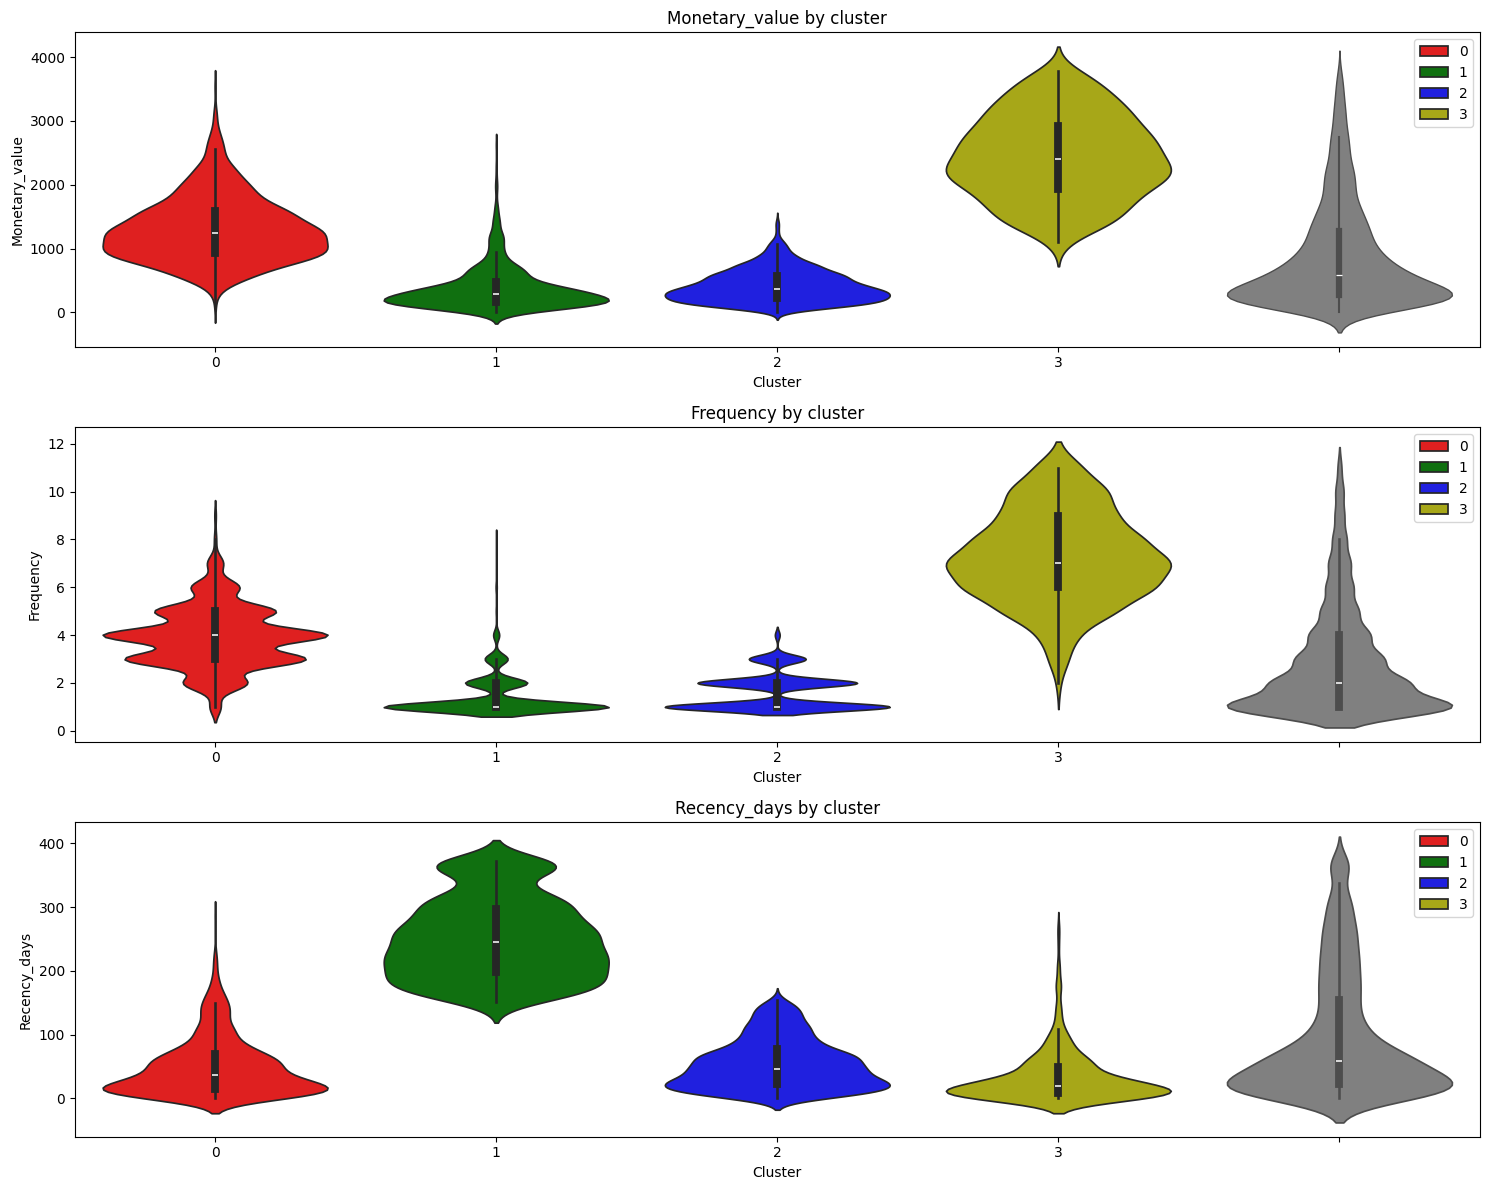

In [ ]:
plt.figure(figsize=(15,12))

colors = ['r', 'g', 'b', 'y']
plt.subplot(3,1,1)
sns.violinplot(data=non_outlier_df,x='Cluster',y='Monetary_value',hue='Cluster',palette=colors)
sns.violinplot(data=non_outlier_df,y='Monetary_value',color='gray', linewidth=1.0) # plotting the entire data at the end for comparison
plt.title('Monetary_value by cluster')
plt.ylabel='Monetary_value'

plt.subplot(3,1,2)
sns.violinplot(data=non_outlier_df,x='Cluster',y='Frequency',hue='Cluster',palette=colors)
sns.violinplot(data=non_outlier_df,y='Frequency',color='gray')
plt.title('Frequency by cluster')
plt.ylabel='Frequency'

plt.subplot(3,1,3)
sns.violinplot(data=non_outlier_df,x='Cluster',y='Recency_days',hue='Cluster',palette=colors)
sns.violinplot(data=non_outlier_df,y='Recency_days',color='gray')
plt.title('Recency_days by cluster')
plt.ylabel='Recency_days'

plt.tight_layout()
plt.show()

# OBSERVATIONS

Cluster(0) / Red: High value customers, who transact with regular frequency, however recency in purchases is missing.



Cluster(1) / Green: Customers with low value and less frequent transactions.But recency is high.

Cluster(2) / Blue: Low value, less frequent customers,but they have made recent purchases

Cluster(3) / High value customers who make frequent purchases, and many of them transacting recently as well

### Suggested Cluster Names and Business Strategies for Each Cluster

#### **Cluster 0 (Red): "ADDRESS"**
- **Description**: These customers are high-value spenders who used to transact regularly but have become inactive recently.
- **Business Strategy**:
  1. **Re-engagement Campaigns**: Send personalized emails or offers to encourage them to return (e.g., loyalty rewards, discounts, or early access to new products).
  2. **Win-Back Initiatives**: Use targeted ads emphasizing products they previously purchased or related ones.
  3. **Exclusive Deals**: Highlight exclusive benefits (e.g., free shipping, priority service) to entice them to come back.

---

#### **Cluster 1 (Green): "ENGAGE"**
- **Description**: These customers make low-value and infrequent transactions, but they have shopped recently.
- **Business Strategy**:
  1. **Upselling and Cross-Selling**: Encourage higher spending through bundling products or showcasing complementary items.
  2. **Loyalty Programs**: Introduce entry-level loyalty perks (e.g., discounts after X purchases) to retain them and encourage repeat purchases.
  3. **Value-Based Offers**: Offer affordable deals or discounts to motivate higher transaction values.

---

#### **Cluster 2 (Blue): "NURTURE"**
- **Description**: Customers with low spending and infrequent transactions but active recent purchases.
- **Business Strategy**:
  1. **Nurturing Campaigns**: Provide educational content or onboarding guides about your product line to increase brand familiarity.
  2. **Introductory Incentives**: Offer beginner-level loyalty perks or discounts for their next purchase to build a habit of engagement.
  3. **Feedback Collection**: Survey these customers to understand their preferences and pain points, using this to tailor future communication.

---

#### **Cluster 3 (Yellow): "PRIORITY"**
- **Description**: High-value customers who make frequent purchases, with many being recent transactions.
- **Business Strategy**:
  1. **Retention and Appreciation**: Reward their loyalty through VIP programs, exclusive product launches, and personalized thank-you messages.
  2. **Upscale Experiences**: Offer premium services like early access to sales, free shipping, or priority customer service.
  3. **Encourage Advocacy**: Leverage their loyalty by incentivizing referrals or reviews (e.g., discounts for referring a friend).
  4. **Data-Driven Personalization**: Use their transaction data to recommend products tailored to their preferences.



### Business Prioritization
1. Focus on **Cluster 3** to maintain their loyalty and expand wallet share.
2. Address **Cluster 0** with reactivation campaigns to recover lost revenue.
3. Nurture **Cluster 2** to increase their frequency and value.
4. Experiment with low-cost, high-reward strategies for **Cluster 1** to minimize churn and encourage growth.


Lets revisit the Monetary outliers and Frequency Outliers we encountered and removed before clustering.

In [ ]:
print(f'No of monetary outliers: {len(Monetary_outliers_df)} \nNo of Frequency outliers: {len(Frequency_outliers_df)}')

No of monetary outliers: 423 
No of Frequency outliers: 279


In [ ]:
Common_indices=(Monetary_outliers_df.index).intersection(Frequency_outliers_df.index) # we are getting an array of indices
print(f'No of common cases in Monetary  & Frequency outliers: {len(Common_indices)}')
#type(Common_indices)

No of common cases in Monetary  & Frequency outliers: 226


In [ ]:
Monetary_only_df=Monetary_outliers_df[~Monetary_outliers_df.index.isin(Common_indices)]
Frequency_only_df=Frequency_outliers_df[~Frequency_outliers_df.index.isin(Common_indices)]
Monetary_and_Frequency_outliers_df=Monetary_outliers_df[Monetary_outliers_df.index.isin(Common_indices)]

Monetary_only_df['Cluster']=-1
Frequency_only_df['Cluster']=-2
Monetary_and_Frequency_outliers_df['Cluster']=-3

outliers_only_df=pd.concat([Monetary_only_df,Frequency_only_df,Monetary_and_Frequency_outliers_df])
outliers_only_df

<ipython-input-73-f02dfcddab92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Monetary_only_df['Cluster']=-1
<ipython-input-73-f02dfcddab92>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frequency_only_df['Cluster']=-2
<ipython-input-73-f02dfcddab92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,Customer ID,Monetary_value,Frequency,Recency,Recency_days,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


<ipython-input-74-ef775cd2ad23>:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(data=outliers_only_df,x='Cluster',y='Monetary_value',hue='Cluster',palette=colors)
<ipython-input-74-ef775cd2ad23>:11: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(data=outliers_only_df,x='Cluster',y='Frequency',hue='Cluster',palette=colors)
<ipython-input-74-ef775cd2ad23>:17: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(data=outliers_only_df,x='Cluster',y='Recency_days',hue='Cluster',palette=colors)


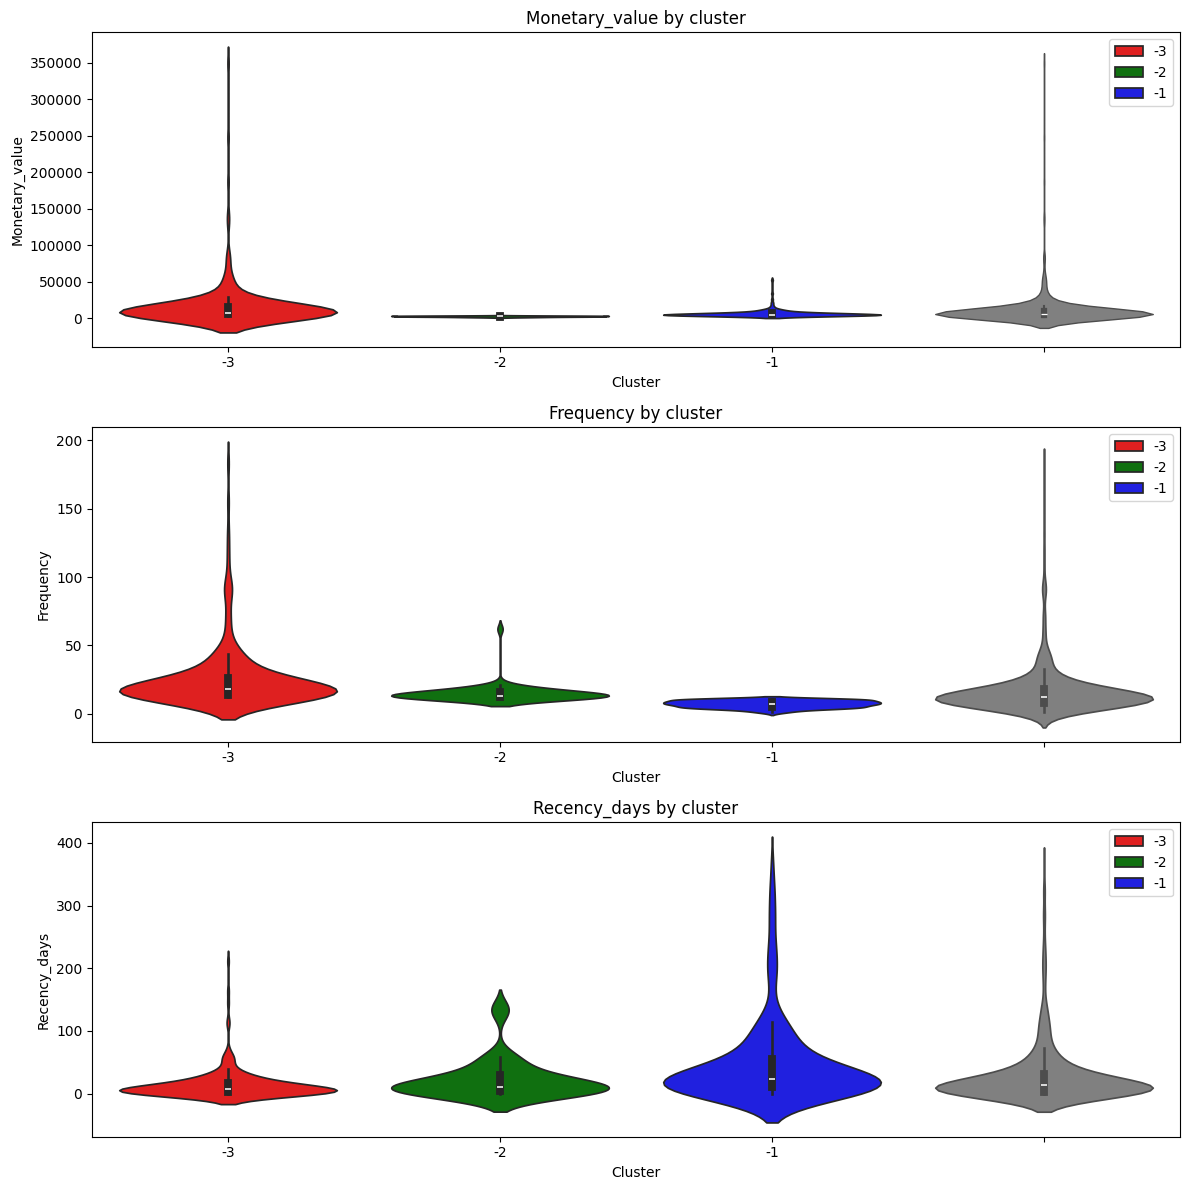

In [ ]:
plt.figure(figsize=(12,12))
colors = ['r', 'g', 'b', 'y']

plt.subplot(3,1,1)
sns.violinplot(data=outliers_only_df,x='Cluster',y='Monetary_value',hue='Cluster',palette=colors)
sns.violinplot(data=outliers_only_df,y='Monetary_value',color='gray', linewidth=1.0) # plotting the entire data at the end for comparison
plt.title('Monetary_value by cluster')
plt.ylabel='Monetary_value'

plt.subplot(3,1,2)
sns.violinplot(data=outliers_only_df,x='Cluster',y='Frequency',hue='Cluster',palette=colors)
sns.violinplot(data=outliers_only_df,y='Frequency',color='gray')
plt.title('Frequency by cluster')
plt.ylabel='Frequency'

plt.subplot(3,1,3)
sns.violinplot(data=outliers_only_df,x='Cluster',y='Recency_days',hue='Cluster',palette=colors)
sns.violinplot(data=outliers_only_df,y='Recency_days',color='gray')
plt.title('Recency_days by cluster')
plt.ylabel='Recency_days'

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) BURGUNDY:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [ ]:
#making a dictionary of labels for mapping onto the numerical values in cluster column

cluster_labels = {
    0: "ADDRESS",
    1: "ENGAGE",
    2: "NURTURE",
    3: "PRIORITY",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "BURGUNDY"
}

# type(cluster_labels)

In [ ]:
final_df=pd.concat([non_outlier_df,outliers_only_df])
final_df['Clusters']=final_df['Cluster'].map(cluster_labels)
final_df

,Customer ID,Monetary_value,Frequency,Recency,Recency_days,Cluster,Clusters
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,ADDRESS
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,ADDRESS
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,BURGUNDY
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,BURGUNDY
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,BURGUNDY
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,BURGUNDY


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4285 entries, 0 to 4262
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer ID     4285 non-null   float64       
 1   Monetary_value  4285 non-null   float64       
 2   Frequency       4285 non-null   int64         
 3   Recency         4285 non-null   datetime64[ns]
 4   Recency_days    4285 non-null   int64         
 5   Cluster         4285 non-null   int64         
 6   Clusters        4285 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 267.8+ KB


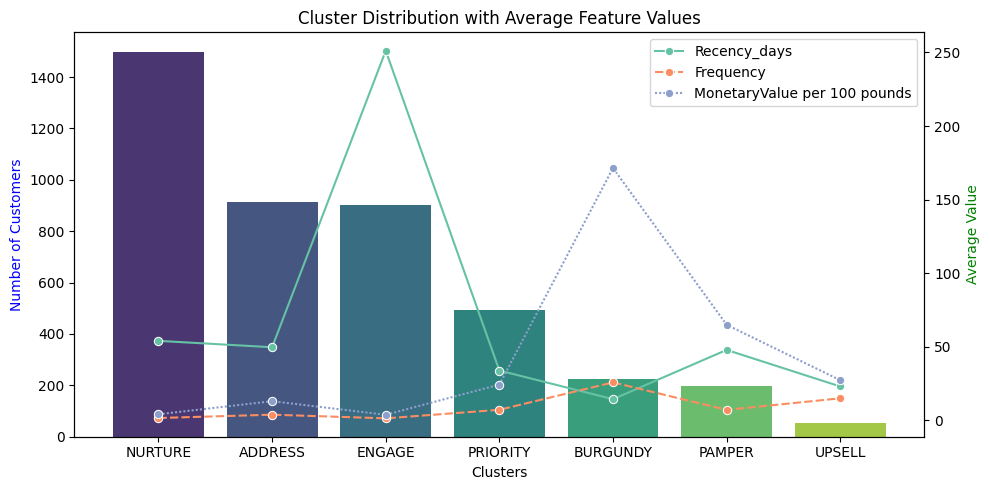

In [ ]:
cluster_counts = final_df['Clusters'].value_counts()
final_df["MonetaryValue per 100 pounds"] = final_df["Monetary_value"] / 100.00 #lets just scale it a bit, else will distort the visual
feature_means = final_df.groupby('Clusters')[['Recency_days', 'Frequency', 'MonetaryValue per 100 pounds']].mean()
# calculates the average value of the selected features for each cluster

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.tight_layout()
plt.show()